In [45]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
data=pd.read_csv('D:\Python\Iris_flower_classification\Iris.csv')

In [47]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [48]:
data.drop(['Id'],axis=1,inplace=True)

In [49]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [51]:
data.drop(['SepalWidthCm'],axis=1,inplace=True)
data.drop(['PetalWidthCm'],axis=1,inplace=True)

In [52]:
data.head()

,SepalLengthCm,PetalLengthCm,Species
0,5.1,1.4,Iris-setosa
1,4.9,1.4,Iris-setosa
2,4.7,1.3,Iris-setosa
3,4.6,1.5,Iris-setosa
4,5.0,1.4,Iris-setosa


In [53]:
data.describe()

,SepalLengthCm,PetalLengthCm
count,150.000000,150.000000
mean,5.843333,3.758667
std,0.828066,1.764420
min,4.300000,1.000000
25%,5.100000,1.600000
50%,5.800000,4.350000
75%,6.400000,5.100000
max,7.900000,6.900000


In [54]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<Axes: >

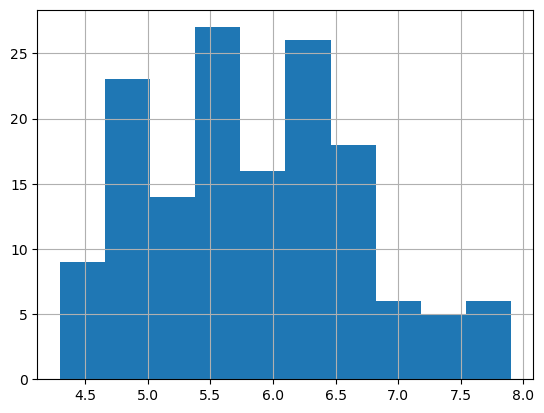

In [55]:
#histogram plot
data['SepalLengthCm'].hist()

<Axes: >

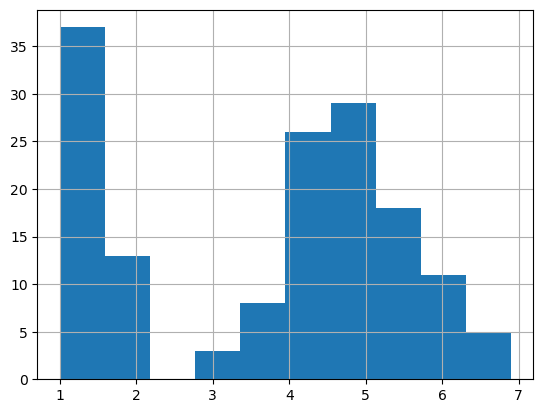

In [56]:
data['PetalLengthCm'].hist()

In [57]:
#scatter plot
colors=['red','yellow','blue']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

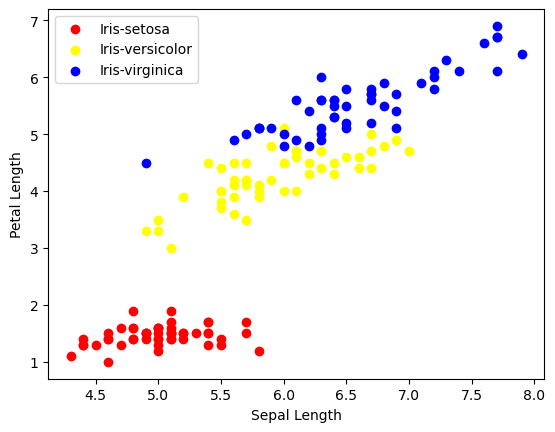

In [58]:
for i in range(0,3):
    x=data[data['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

In [59]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [60]:
#Correlation matrix

data.corr()

C:\Users\Sruti Dey\AppData\Local\Temp\ipykernel_15404\3417076221.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,SepalLengthCm,PetalLengthCm
SepalLengthCm,1.000000,0.871754
PetalLengthCm,0.871754,1.000000


C:\Users\Sruti Dey\AppData\Local\Temp\ipykernel_15404\306472214.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True, cmap="YlGnBu")


<Axes: >

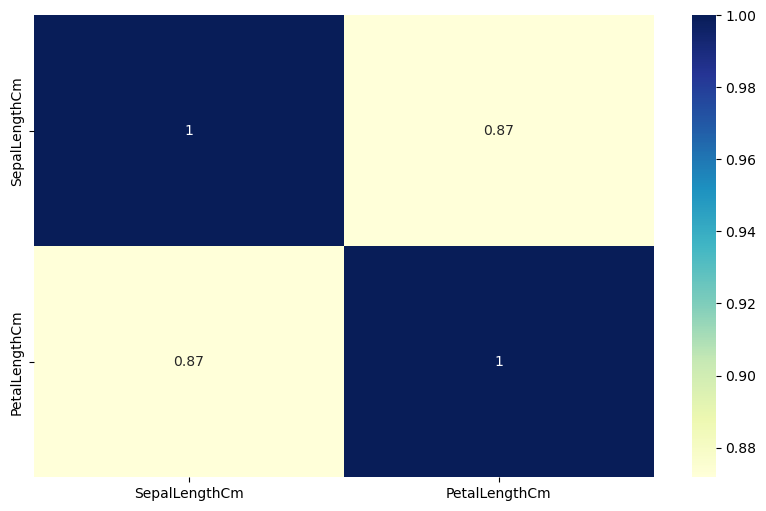

In [61]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True, cmap="YlGnBu")

In [62]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder

In [63]:
le=LabelEncoder()
data['Species']=le.fit_transform(data['Species'])

In [64]:
data

,SepalLengthCm,PetalLengthCm,Species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


<Axes: >

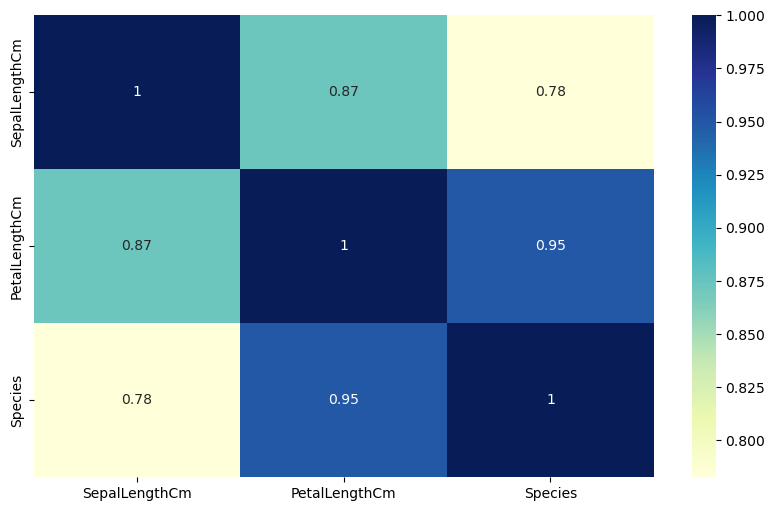

In [65]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True, cmap="YlGnBu")

## Model Training



In [66]:
from sklearn.model_selection import train_test_split as tts

In [67]:
X=data.drop(['Species'],axis=1)
y=data['Species']

In [68]:
X_train, X_test,y_train,y_test=tts(X,y,test_size=0.2)

### Linear regression

In [69]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.8397021844804778

### Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

0.9333333333333333

### k-NN clasification

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9

### decision Tree Classification

In [72]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.9